In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [3]:
d=pd.read_csv('diabetes.csv')

In [4]:
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
d.shape

(768, 9)

In [6]:
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
d.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
d.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

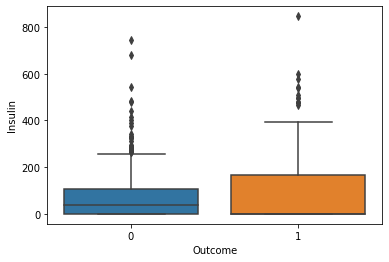

In [10]:
sns.boxplot(x='Outcome' , y='Insulin', data=d)

In [11]:
d=d[d['Insulin']<550]

In [12]:
d.skew()

Pregnancies                 0.901234
Glucose                     0.168346
BloodPressure              -1.840910
SkinThickness               0.116120
Insulin                     1.788202
BMI                        -0.445934
DiabetesPedigreeFunction    1.822685
Age                         1.135259
Outcome                     0.642648
dtype: float64

In [13]:
corrmat = d.corr()
corrmat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.137037,0.142270,-0.079273,-0.068162,0.023553,-0.035421,0.546912,0.223261
Glucose,0.137037,1.000000,0.153506,0.048738,0.309038,0.215845,0.122982,0.264266,0.469892
BloodPressure,0.142270,0.153506,1.000000,0.207233,0.092804,0.280205,0.041651,0.242895,0.066800
SkinThickness,-0.079273,0.048738,0.207233,1.000000,0.456591,0.389729,0.178212,-0.113673,0.073315
Insulin,-0.068162,0.309038,0.092804,0.456591,1.000000,0.192951,0.156273,-0.067840,0.126348
BMI,0.023553,0.215845,0.280205,0.389729,0.192951,1.000000,0.139570,0.042096,0.297562
DiabetesPedigreeFunction,-0.035421,0.122982,0.041651,0.178212,0.156273,0.139570,1.000000,0.035410,0.181697
Age,0.546912,0.264266,0.242895,-0.113673,-0.067840,0.042096,0.035410,1.000000,0.233676
Outcome,0.223261,0.469892,0.066800,0.073315,0.126348,0.297562,0.181697,0.233676,1.000000


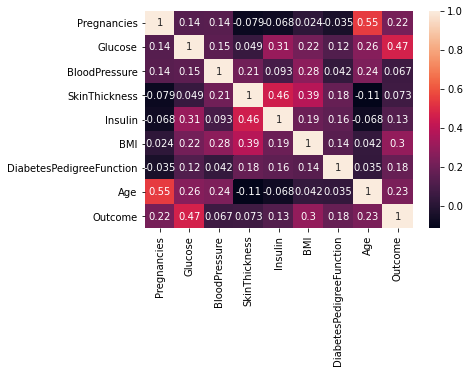

In [14]:
sns.heatmap(d.corr(),annot=True)

In [15]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    int64  
 2   BloodPressure             763 non-null    int64  
 3   SkinThickness             763 non-null    int64  
 4   Insulin                   763 non-null    int64  
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 59.6 KB


In [16]:
d_features=d.iloc[:, d.columns !='Outcome']

In [17]:
d_features.shape

(763, 8)

In [18]:
d_target=d.iloc[:, d.columns== 'Outcome']

In [19]:
d_target.shape

(763, 1)

In [20]:
d_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
d_target.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [25]:
d_target['Outcome'].value_counts()

0    498
1    265
Name: Outcome, dtype: int64

In [23]:
x=pd.DataFrame(d_features)
x.shape

(763, 8)

In [24]:
y=pd.DataFrame(d_target)
y.shape

(763, 1)

In [27]:
##### under sampling 

In [26]:
!pip install imblearn

In [28]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()

In [30]:
X_res,y_res=nm.fit_sample(x,y)

In [31]:
X_res.shape

(530, 8)

In [32]:
y_res.shape

(530, 1)

In [34]:
y_res['Outcome'].value_counts()

1    265
0    265
Name: Outcome, dtype: int64

In [36]:
y['Outcome'].value_counts()

0    498
1    265
Name: Outcome, dtype: int64

In [37]:
#### Create a generalized function to calculate the metrics for the test set

In [38]:
# create a generalized function to calculate the metrics values for test set

In [41]:
def get_test_report(model):
    # return the performace measures on test set
    return(classification_report(y_test,y_pred))

In [42]:
### Create a generalized function to calculate the kappa score for the test set
# create a generalized function to calculate the metrics values for test set

In [43]:
def kappa_score(model):
    # return the kappa score on test set
    return(cohen_kappa_score(y_test,y_pred))

In [64]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [74]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Outcome', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [46]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

In [47]:
#### Logistic Regression (using MLE)

In [48]:
#### Introduce the intercept term

In [51]:
# add the intercept column using 'add_constant()'
x = sm.add_constant(x)

# print the first five bservations after adding intercept
x.head()

,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,6,148,72,35,0,33.6,0.627,50
1,1.0,1,85,66,29,0,26.6,0.351,31
2,1.0,8,183,64,0,0,23.3,0.672,32
3,1.0,1,89,66,23,94,28.1,0.167,21
4,1.0,0,137,40,35,168,43.1,2.288,33


In [52]:
#### Split the dataset into train and test sets

In [54]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (534, 9)
y_train (534, 1)
X_test (229, 9)
y_test (229, 1)


In [55]:
### Build a logistic regression model using statsmodels

In [56]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
log_reg_model = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.421243
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  534
Model:                          Logit   Df Residuals:                      525
Method:                           MLE   Df Model:                            8
Date:                Fri, 05 Feb 2021   Pseudo R-squ.:                  0.3471
Time:                        18:35:27   Log-Likelihood:                -224.94
converged:                       True   LL-Null:                       -344.55
Covariance Type:            nonrobust   LLR p-value:                 3.339e-47
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.9887      0.964    -10.364      0.000     -11.878

In [57]:
#### Do predictions on the test set

In [58]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = log_reg_model.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

144    0.425291
607    0.018505
219    0.405787
196    0.036357
393    0.094400
dtype: float64

In [115]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]

In [116]:
# print the first five predictions
y_pred[0:5]

['1', '0', '1', '0', '1']

In [117]:
#### Calculate the performance measures

In [118]:
### Build a confusion matrix
# convert the predicted values to type 'float32'
y_pred = np.array(y_pred, dtype=np.float32)

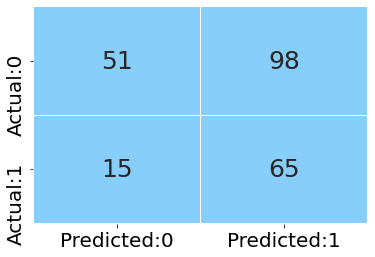

In [119]:
# call the function to plot the confusion matrix
# pass the logistic regression model to the function
plot_confusion_matrix(log_reg_model)

In [90]:
#### Calculate performance measures on the test set

In [126]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression model to the function
test_report = get_test_report(log_reg_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.77      0.34      0.47       149
           1       0.40      0.81      0.53        80

    accuracy                           0.51       229
   macro avg       0.59      0.58      0.50       229
weighted avg       0.64      0.51      0.50       229



In [121]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression model to the function
kappa_value = kappa_score(log_reg_model)

# print the kappa value
print(kappa_value)

0.12480129874522261


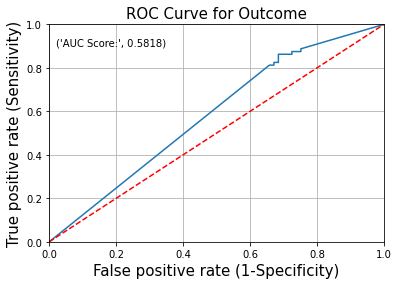

In [122]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression model to the function
plot_roc(log_reg_model)

In [123]:
### Tabulate the results

In [124]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.754446,0.620690,0.2250,0.681223,0.177353,0.330275
1,Logistic Regression (SGD),0.581753,0.398773,0.8125,0.506550,0.124801,0.534979
2,Logistic Regression,0.581753,0.398773,0.8125,0.506550,0.124801,0.534979


In [92]:
##### Getting best threshold value for Imbalanced Dataset

In [125]:
# let 'y_pred_prob' be the predicted values of y
y_pred_roc = log_reg_model.predict(X_test)

# print the y_pred_prob
y_pred_roc.head()

144    0.425291
607    0.018505
219    0.405787
196    0.036357
393    0.094400
dtype: float64

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_roc)

In [95]:
# J-stats
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.259842


In [96]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_roc = ['0' if x < 0.26 else '1' for x in y_pred_prob]

In [97]:
# convert the predicted values to type 'float32'
y_pred_roc = np.array(y_pred_roc, dtype=np.float32)

# print the first five predictions
y_pred_roc[0:5]

array([1., 0., 1., 0., 0.], dtype=float32)

In [98]:
confusion_matrix(y_test, y_pred_roc)

array([[98, 51],
       [17, 63]], dtype=int64)

In [99]:
print(classification_report(y_test, y_pred_roc))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74       149
           1       0.55      0.79      0.65        80

    accuracy                           0.70       229
   macro avg       0.70      0.72      0.70       229
weighted avg       0.75      0.70      0.71       229



In [100]:
### ogistic Regression (using SGD)

In [101]:
### The data has been split in section in the above for logistic regression 

In [102]:
### Build the model

In [103]:
# instantiate the 'SGDClassifier' to build model using SGD
# to perform logistic regression, consider the log-loss function 
# set 'random_state' to generate the same dataset each time you run the code 
SGD = SGDClassifier(loss = 'log', random_state = 10)

# fit the model on scaled training data
logreg_with_SGD = SGD.fit(X_train, y_train)

In [104]:
### Do predictions on the test set

In [105]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = logreg_with_SGD.predict_proba(X_test)[:,1]

In [106]:
# use predict() to predict the class labels of target variable
y_pred = logreg_with_SGD.predict(X_test)

In [107]:
##### Compute accuracy measures

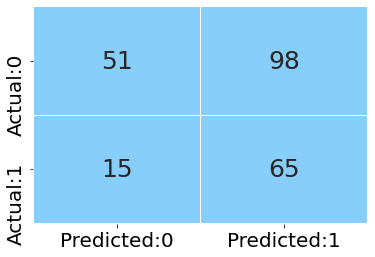

In [108]:
# call the function to plot the confusion matrix
# pass the logistic regression (SGD) model to the function
plot_confusion_matrix(logreg_with_SGD)

In [109]:
#######  Calculate performance measures on the test set.

In [110]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression (SGD) model to the function
test_report = get_test_report(logreg_with_SGD)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.77      0.34      0.47       149
           1       0.40      0.81      0.53        80

    accuracy                           0.51       229
   macro avg       0.59      0.58      0.50       229
weighted avg       0.64      0.51      0.50       229



In [111]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression (SGD) model to the function
kappa_value = kappa_score(logreg_with_SGD)

# print the kappa value
print(kappa_value)

0.12480129874522261


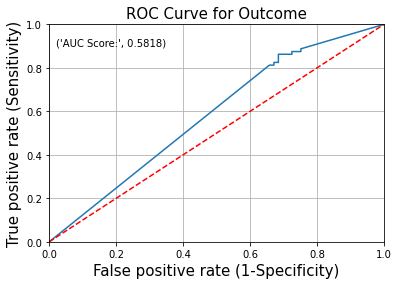

In [112]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression (SGD) model to the function
plot_roc(logreg_with_SGD)

In [113]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression (SGD)' as model name to the function
update_score_card(model_name = 'Logistic Regression (SGD)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.754446,0.620690,0.2250,0.681223,0.177353,0.330275
1,Logistic Regression (SGD),0.581753,0.398773,0.8125,0.506550,0.124801,0.534979
